# グロー放電

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

excel_name = "24_プラズマ.xlsx"
df = pd.read_excel(excel_name,sheet_name = 3,header = 1)
df2 = pd.read_excel(excel_name,sheet_name = 5,header = 1)
df3 = pd.read_excel(excel_name,sheet_name = 4,header = 2)
df3

df


,Unnamed: 0,P = 53pa,P = 80pa,P = 30pa,Unnamed: 4,Unnamed: 5,P = 30pa.1,P = 50pa,P = 80pa.1,Unnamed: 9,Unnamed: 10,3,Unnamed: 12,P = 30pa.2,P = 50pa.1,P = 80pa.2
0,I(mA),-V(kV),-V(kV),-V(kV),NaN,I(mA),d(cm),d(cm),d(cm),NaN,NaN,NaN,I(mA),d(cm),d(cm),d(cm)
1,10,0.43,0.39,0.65,NaN,10,0.6,0.4,0.3,NaN,NaN,NaN,10,0.9,0.7,0.6
2,9,0.42,0.39,0.64,NaN,9,0.6,0.4,0.4,NaN,NaN,NaN,9,0.9,0.7,0.7
3,8,0.41,0.39,0.64,NaN,8,0.7,0.5,0.4,NaN,NaN,NaN,8,1,0.8,0.7
4,7,0.41,0.39,0.63,NaN,7,0.8,0.6,0.3,NaN,NaN,NaN,7,1.1,0.9,0.6
5,6,0.4,0.38,0.61,NaN,6,0.8,0.6,0.4,NaN,NaN,NaN,6,1.1,0.9,0.7
6,5,0.4,0.38,0.6,NaN,5,0.8,0.6,0.5,NaN,NaN,NaN,5,1.1,0.9,0.8
7,4,0.4,0.38,0.59,NaN,4,1,0.7,0.5,NaN,NaN,NaN,4,1.3,1,0.8
8,3,0.39,NaN,0.56,NaN,3,1.1,0.8,NaN,NaN,NaN,NaN,3,1.4,1.1,NaN
9,2,0.39,NaN,0.53,NaN,2,1.3,0.8,NaN,NaN,NaN,NaN,2,1.6,1.1,NaN


# ステンレスV-I曲線


1    0.39
2    0.39
3    0.39
4    0.39
5    0.38
6    0.38
7    0.38
Name: P = 80pa, dtype: object


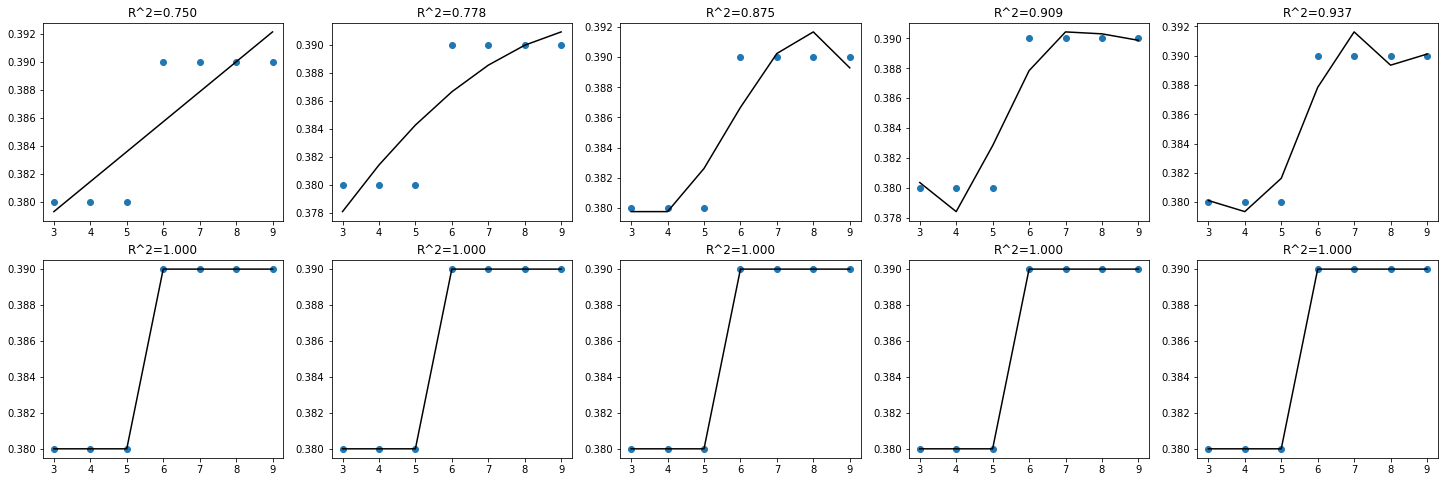

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


i = df['Unnamed: 0'][1:10]
sv30 = df['P = 30pa'][1:10]
sv50 = df['P = 53pa'][1:10]
sv80 = df['P = 80pa'][1:8]
print(sv80)


# データとターゲットをモデルに適した形状に変換する
data = np.array(i[1:8]).reshape(-1,1)
target = np.array(sv80).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 2:
    p_poly80 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()


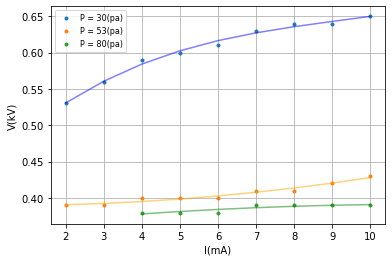

In [88]:
from matplotlib import pyplot as plt  

i = df['Unnamed: 0'][1:10]
sv30 = df['P = 30pa'][1:10]
sv50 = df['P = 53pa'][1:10]
sv80 = df['P = 80pa'][1:10]


plt.plot(i, sv30,'.',label = 'P = 30(pa)')
plt.plot(i, sv50,'.',label = 'P = 53(pa)')
plt.plot(i, sv80,'.',label = 'P = 80(pa)')
plt.plot(i,p_poly3,color = 'blue',alpha = 0.5)
plt.plot(i,p_poly2,color = 'orange',alpha = 0.5)
plt.plot(i[0:7],p_poly80,color = 'green',alpha = 0.5)


plt.xlabel('I(mA)')
plt.ylabel('V(kV)')

plt.legend(fontsize = '8')
plt.grid()
plt.savefig('glow_IV_stenles.png')

# ステンレス　シース長

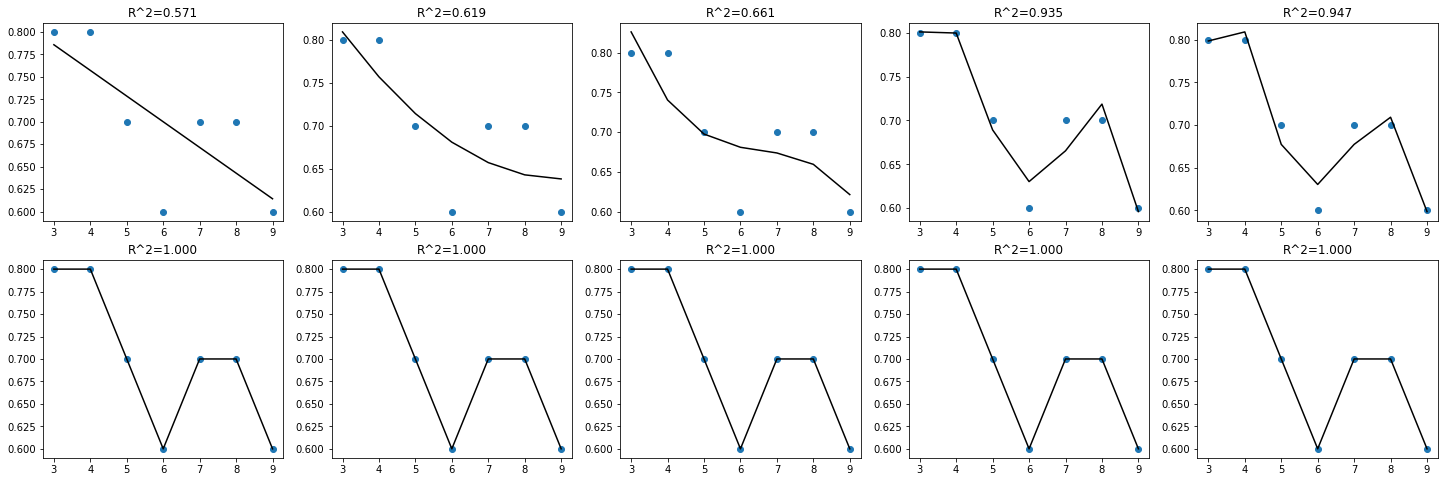

1    10
2     9
3     8
4     7
5     6
6     5
7     4
8     3
9     2
Name: Unnamed: 0, dtype: object
1    0.6
2    0.7
3    0.7
4    0.6
5    0.7
6    0.8
7    0.8
Name: P = 80pa.2, dtype: object


In [99]:


id = df['Unnamed: 0'][1:10]
sd30 = df['P = 30pa.2'][1:10]
sd50 = df['P = 50pa.1'][1:10]
sd80 = df['P = 80pa.2'][1:8]


# データとターゲットをモデルに適した形状に変換する
data = np.array(id[1:8]).reshape(-1,1)
target = np.array(sd80).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 2:
    p_poly80 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()
print(id)
print(sd80)

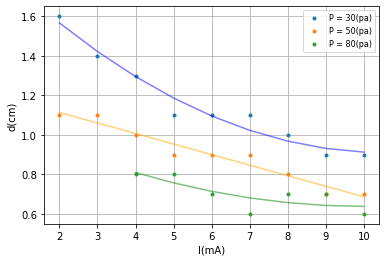

In [111]:
from matplotlib import pyplot as plt  


plt.plot(id, sd30,'.',label = 'P = 30(pa)')
plt.plot(id, sd50,'.',label = 'P = 50(pa)')
plt.plot(id[0:7], sd80,'.',label = 'P = 80(pa)')
plt.plot(id, p_poly30,color = 'blue',alpha = 0.5)
plt.plot(id, p_poly50,color = 'orange',alpha = 0.5)
plt.plot(id[0:7], p_poly80,color = 'green',alpha = 0.5)

#plt.plot(i, sd80,'.',label = 'P = 80(pa)')
#plt.plot(i, sd80,'.',label = 'P = 80(pa)')


plt.xlabel('I(mA)')
plt.ylabel('d(cm)')

plt.legend(fontsize = '8')
plt.grid()
plt.savefig('glow_d_stenles.png')

# Al IVとシース長

In [3]:
df2

,Unnamed: 0,P = 30pa,P = 50pa,P = 80pa,Unnamed: 4,Unnamed: 5,P = 30pa.1,P = 50pa.1,P = 80pa.1,Unnamed: 9,3mm足す,Unnamed: 11,P = 30pa.2,P = 50pa.2,P = 80pa.2
0,I(mA),-V(kV),-V(kV),-V(kV),NaN,I(mA),d(cm),d(cm),d(cm),NaN,3.0,I(mA),d(cm),d(cm),d(cm)
1,10,0.44,0.37,0.34,NaN,10,0.6,0.4,0.1,NaN,NaN,10,0.6,0.4,0.1
2,9,0.44,0.36,0.29,NaN,9,0.7,0.5,0.1,NaN,NaN,9,0.7,0.5,0.1
3,8,0.44,0.35,0.29,NaN,8,0.7,0.5,0.1,NaN,NaN,8,0.7,0.5,0.1
4,7,0.44,0.35,0.29,NaN,7,0.7,0.5,0.1,NaN,NaN,7,0.7,0.5,0.1
5,6,0.44,0.35,0.29,NaN,6,0.9,0.6,0.1,→ふれ始める,NaN,6,0.9,0.6,0.1
6,5,0.43,0.34,0.29,NaN,5,1,0.7,0.1,NaN,NaN,5,1,0.7,0.1
7,4,0.41,0.33,NaN,NaN,4,1,0.7,NaN,NaN,NaN,4,1,0.7,NaN
8,3,0.4,0.32,NaN,NaN,3,1.2,0.7,NaN,NaN,NaN,3,1.2,0.7,NaN
9,2,0.39,0.32,NaN,NaN,2,1.4,0.8,NaN,NaN,NaN,2,1.4,0.8,NaN


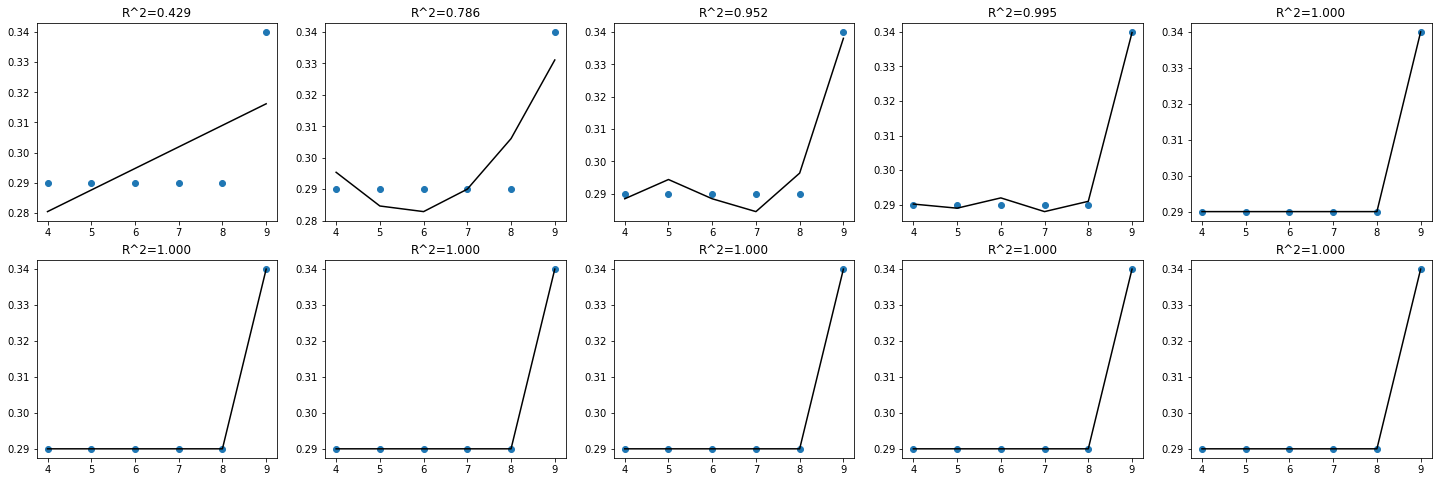

1    10
2     9
3     8
4     7
5     6
6     5
7     4
8     3
9     2
Name: Unnamed: 0, dtype: object
1    0.34
2    0.29
3    0.29
4    0.29
5    0.29
6    0.29
Name: P = 80pa, dtype: object


In [52]:

id = df2['Unnamed: 0'][1:10]
av30 = df2['P = 30pa'][1:10]
av50 = df2['P = 50pa'][1:10]
av80 = df2['P = 80pa'][1:7]


# データとターゲットをモデルに適した形状に変換する
data = np.array(id[1:7]).reshape(-1,1)
target = np.array(av80).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 4:
    p_poly80 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()
print(id)
print(av80)

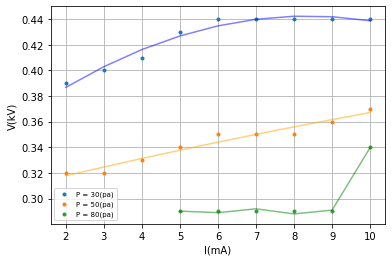

In [53]:
from matplotlib import pyplot as plt  



plt.plot(id, av30,'.',label = 'P = 30(pa)')
plt.plot(id, av50,'.',label = 'P = 50(pa)')
plt.plot(id[0:6], av80,'.',label = 'P = 80(pa)')
plt.plot(id, p_poly30,color = 'blue',alpha = 0.5)
plt.plot(id, p_poly50,color = 'orange',alpha = 0.5)
plt.plot(id[0:6], p_poly80,color = 'green',alpha = 0.5)


plt.xlabel('I(mA)')
plt.ylabel('V(kV)')

plt.legend(loc = 'lower left',fontsize = 7)
plt.grid()
plt.savefig('glow_IV_Al.png')

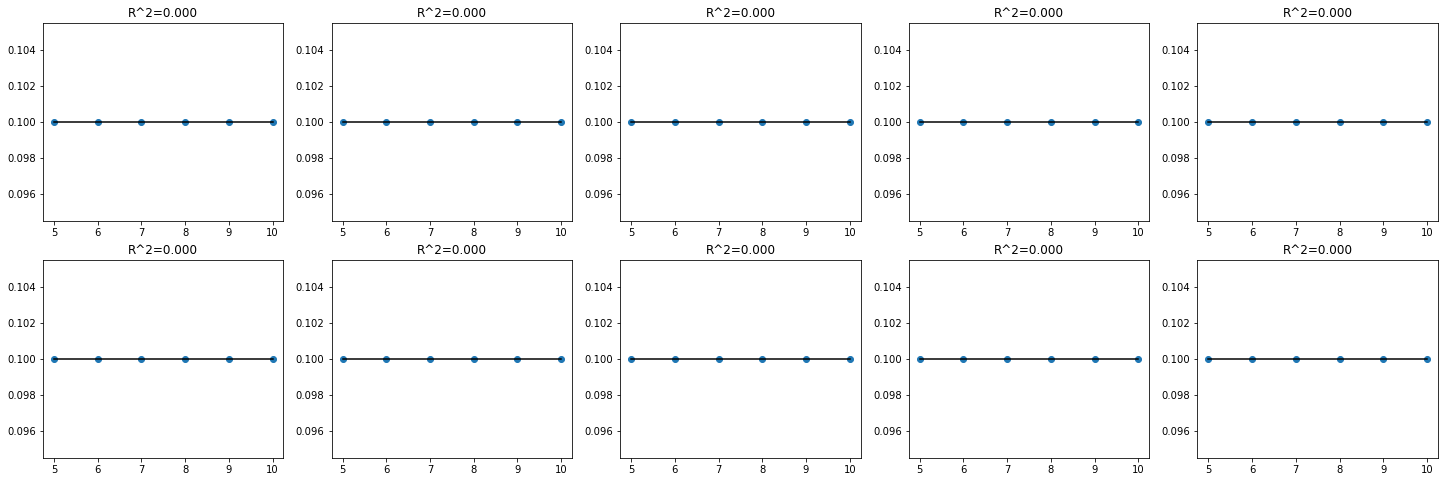

1    10
2     9
3     8
4     7
5     6
6     5
7     4
8     3
9     2
Name: Unnamed: 0, dtype: object


In [60]:
i = df2['Unnamed: 0'][1:10]
ad30 = df2['P = 30pa.2'][1:10]
ad50 = df2['P = 50pa.1'][1:10]
ad80 = df2['P = 80pa.2'][1:7]



# データとターゲットをモデルに適した形状に変換する
data = np.array(i[0:6]).reshape(-1,1)
target = np.array(ad80).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 2:
    p_poly80 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()
print(id)
#print(sd80)

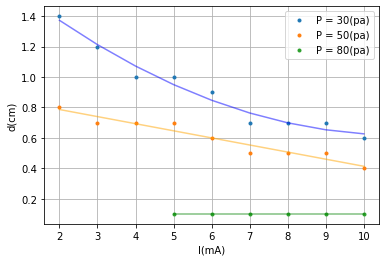

In [66]:
from matplotlib import pyplot as plt  



plt.plot(id, ad30,'.',label = 'P = 30(pa)')
plt.plot(id, ad50,'.',label = 'P = 50(pa)')
plt.plot(id[0:6], ad80[0:6],'.',label = 'P = 80(pa)')

plt.plot(id, p_poly30,color = 'blue',alpha = 0.5)
plt.plot(id, p_poly50,color = 'orange',alpha = 0.5)
plt.plot(id[0:6], p_poly80,color = 'green',alpha = 0.5)
plt.xlabel('I(mA)')
plt.ylabel('d(cm)')

plt.legend()
plt.grid()
plt.savefig('glow_d_Al.png')

# Cu VI曲線 シース長

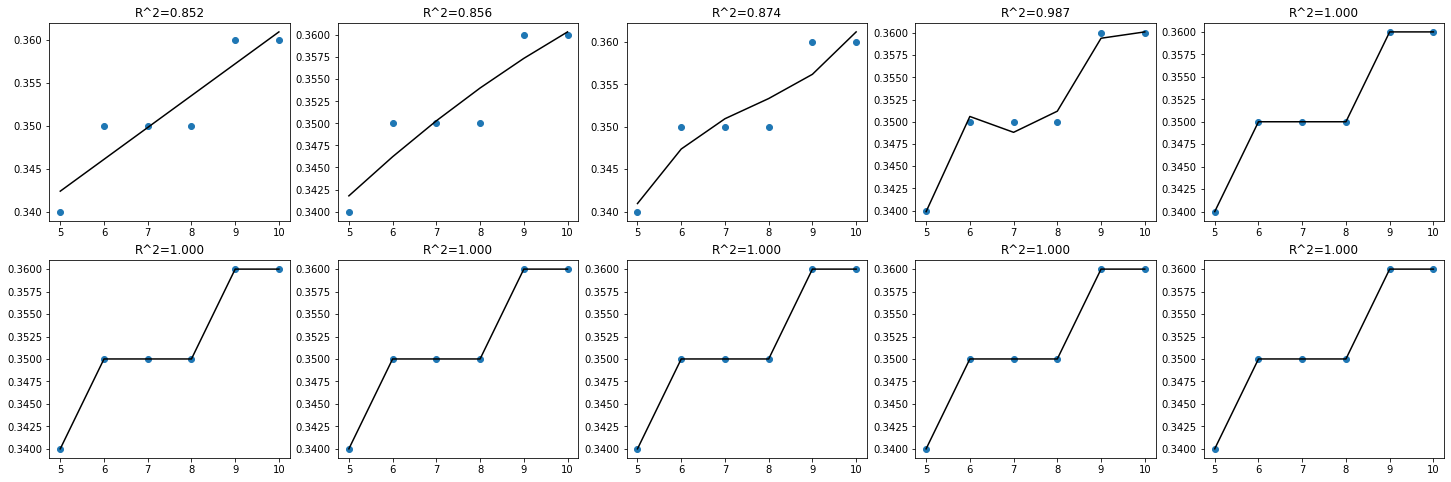

1    10
2     9
3     8
4     7
5     6
6     5
7     4
8     3
9     2
Name: Unnamed: 0, dtype: object
1    0.34
2    0.29
3    0.29
4    0.29
5    0.29
6    0.29
Name: P = 80pa, dtype: object


In [74]:

#i = df3['Unnamed: 0'][1:10]
cv30 = df3['P = 30pa'][1:10]
cv50 = df3['P = 50pa'][1:10]
cv80 = df3['P = 80pa'][1:7]


# データとターゲットをモデルに適した形状に変換する
data = np.array(id[0:6]).reshape(-1,1)
target = np.array(cv80).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 2:
    p_poly80 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()
print(id)
print(av80)

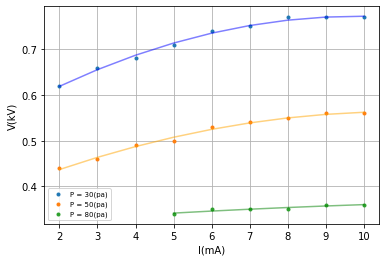

In [75]:
from matplotlib import pyplot as plt  



plt.plot(id, cv30,'.',label = 'P = 30(pa)')
plt.plot(id, cv50,'.',label = 'P = 50(pa)')
plt.plot(id[0:6], cv80,'.',label = 'P = 80(pa)')
plt.plot(id, p_poly30,color = 'blue',alpha = 0.5)
plt.plot(id, p_poly50,color = 'orange',alpha = 0.5)
plt.plot(id[0:6], p_poly80,color = 'green',alpha = 0.5)


plt.xlabel('I(mA)')
plt.ylabel('V(kV)')

plt.legend(loc = 'lower left',fontsize = 7)
plt.grid()
plt.savefig('glow_IV_Cu.png')

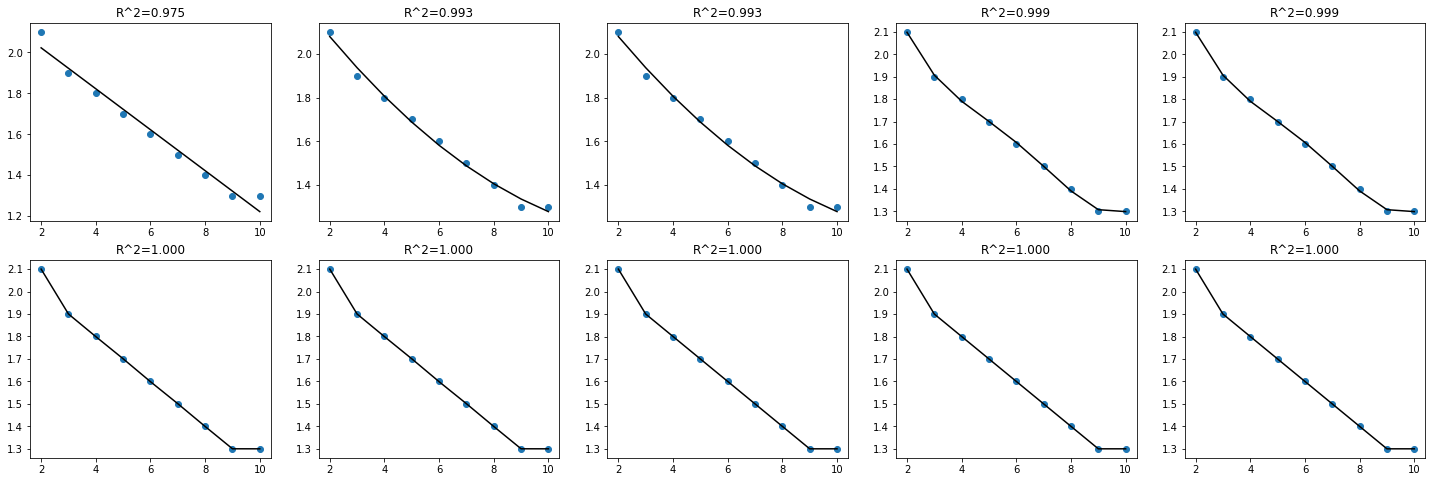

1    10
2     9
3     8
4     7
5     6
6     5
7     4
8     3
9     2
Name: Unnamed: 0, dtype: object
1    0.34
2    0.29
3    0.29
4    0.29
5    0.29
6    0.29
Name: P = 80pa, dtype: object


In [78]:

from matplotlib import pyplot as plt  

#i = df3['Unnamed: 0'][1:10]
cd30 = df3['P = 30pa.2'][1:10]
cd50 = df3['P = 50pa.1'][1:10]
cd80 = df3['P = 80pa.2'][1:7]


# データとターゲットをモデルに適した形状に変換する
data = np.array(id).reshape(-1,1)
target = np.array(cd30).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 2:
    p_poly30 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()
print(id)
print(av80)

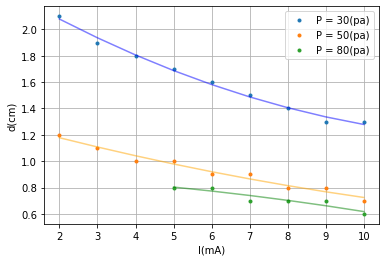

In [79]:



plt.plot(id, cd30,'.',label = 'P = 30(pa)')
plt.plot(id, cd50,'.',label = 'P = 50(pa)')
plt.plot(id[0:6], cd80,'.',label = 'P = 80(pa)')
plt.plot(id, p_poly30,color = 'blue',alpha = 0.5)
plt.plot(id, p_poly50,color = 'orange',alpha = 0.5)
plt.plot(id[0:6], p_poly80,color = 'green',alpha = 0.5)


plt.xlabel('I(mA)')
plt.ylabel('d(cm)')

plt.legend()
plt.grid()
plt.savefig('glow_d_Cu.png')

# 金属ごとの比較
## p = 80pa

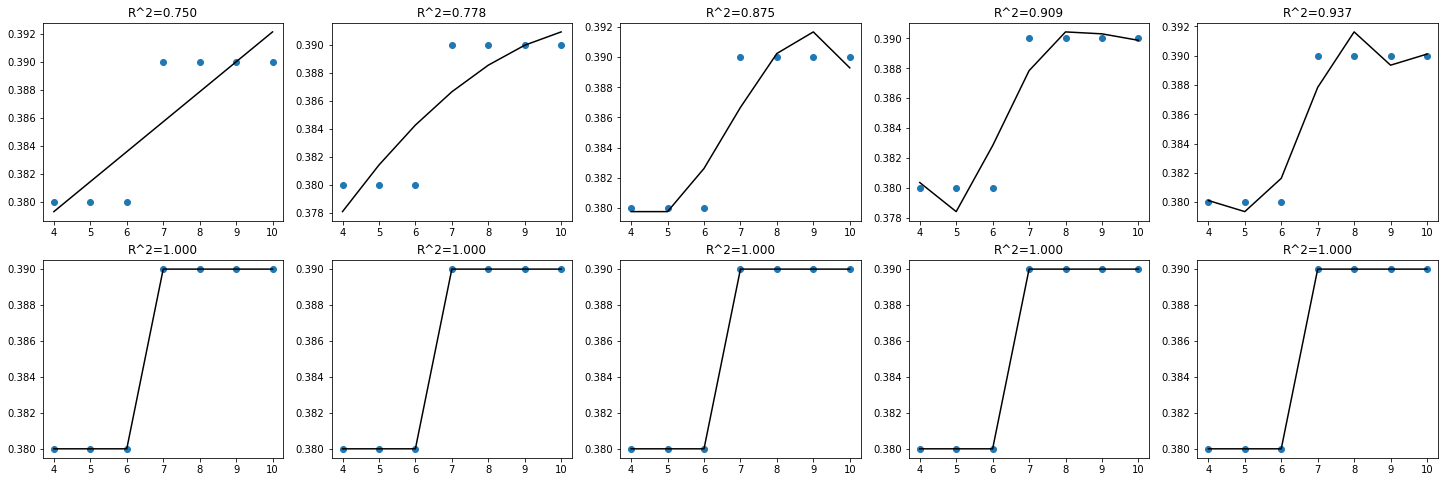

In [85]:

from matplotlib import pyplot as plt  



# データとターゲットをモデルに適した形状に変換する
data = np.array(id[0:7]).reshape(-1,1)
target = np.array(sv80).reshape(-1,1)

# 次数の設定
deg = [1,2,3,4,5,6,7,8,9,10]

# 次数の数だけグラフを準備(2行5列のサブプロット)
fig, axes = plt.subplots(2, 5, figsize=(25,8))

# 非線形変換とパラメータ学習
for d in deg:
  # pipelineを活用してデータの変換から学習・推定までの処理を一つの推定器として実行
  # 多項式変換した後、線形回帰モデルでパラメータを学習
  regr = Pipeline([
                   ('poly', PolynomialFeatures(degree=d)),
                   ('linear', LinearRegression())
                   ])

  # モデルの学習
  regr.fit(data, target)

  # 学習モデルによる予測結果の算出
  p_poly = regr.predict(data)
  if d == 2:
    p_polysv80 = p_poly
  # グラフ作成(次数の数だけグラフ化)
  if d < 6:
    i, j = 0, d-1
  else:
    i, j = 1, d-6
  axes[i][j].scatter(data, target)
  axes[i][j].plot(data, p_poly, color='black') # 決定係数の算出
  axes[i][j].set_title('R^2={:.3f}'.format(regr.score(data, target)))

plt.show()


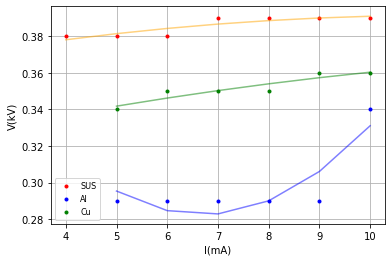

In [87]:
i = id[0:6]
plt.plot(id[0:7],sv80,'.',label = 'SUS',color = 'red')
plt.plot(i,av80,'.',label = 'Al',color = 'blue')
plt.plot(i,cv80,'.',label = 'Cu',color = 'green')
plt.plot(i, p_polyav30,color = 'blue',alpha = 0.5)
plt.plot(id[0:7], p_polysv80,color = 'orange',alpha = 0.5)
plt.plot(i, p_polycv30,color = 'green',alpha = 0.5)
plt.legend(fontsize = '8',loc = 'lower left')
plt.xlabel('I(mA)')
plt.ylabel('V(kV)')
plt.grid()
plt.savefig('p80_metal_comp_IV.png')

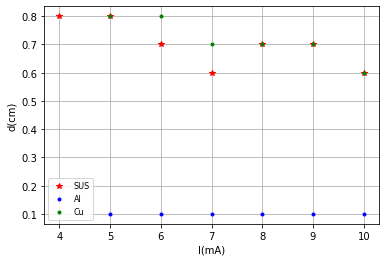

In [23]:
plt.plot(i,sd80,'*',label = 'SUS',color = 'red')
plt.plot(i,ad80,'.',label = 'Al',color = 'blue')
plt.plot(i,cd80,'.',label = 'Cu',color = 'green')

plt.legend(fontsize = '8',loc = 'lower left')
plt.xlabel('I(mA)')
plt.ylabel('d(cm)')
plt.grid()
plt.savefig('p80_metal_comp_d.png')

## p = 50

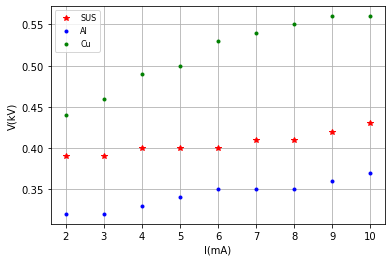

In [22]:
plt.plot(i,sv50,'*',label = 'SUS',color = 'red')
plt.plot(i,av50,'.',label = 'Al',color = 'blue')
plt.plot(i,cv50,'.',label = 'Cu',color = 'green')

plt.legend(fontsize = '8')
plt.xlabel('I(mA)')
plt.ylabel('V(kV)')
plt.grid()
plt.savefig('p50_metal_comp_IV.png')

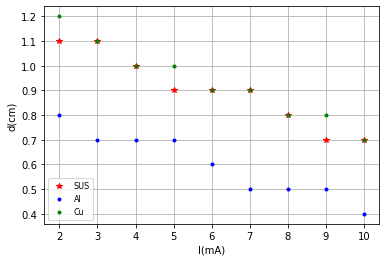

In [24]:
plt.plot(i,sd50,'*',label = 'SUS',color = 'red')
plt.plot(i,ad50,'.',label = 'Al',color = 'blue')
plt.plot(i,cd50,'.',label = 'Cu',color = 'green')

plt.legend(fontsize = '8',loc = 'lower left')
plt.grid()
plt.xlabel('I(mA)')
plt.ylabel('d(cm)')
plt.savefig('p50_metal_comp_d.png')